In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import scipy.stats as sci
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import re
import pylab

In [325]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [271]:
gene_df=pd.read_csv("brainlipo.csv",index_col=3)
gene_df.head()

,row_num,gene_id,ensembl_gene_id,entrez_id,1-8 pcw-M-Ocx,2-8 pcw-M-M1C-S1C,3-8 pcw-M-AMY,4-8 pcw-M-MGE,5-8 pcw-M-STC,6-8 pcw-M-URL,...,515-40 yrs-F-A1C,516-40 yrs-F-CBC,517-40 yrs-F-V1C,518-40 yrs-F-OFC,519-40 yrs-F-STC,520-40 yrs-F-IPC,521-40 yrs-F-M1C,522-40 yrs-F-HIP,523-40 yrs-F-STR,524-40 yrs-F-S1C
gene_symbol,,,,,,,,,,,,,,,,,,,,,
DPM1,3,8736,ENSG00000000419,8813,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
PIGQ,193,8968,ENSG00000007541,9091,4.957886,4.885296,4.508666,4.872717,4.399800,7.042405,...,6.230731,6.157183,5.215355,4.454139,4.668274,3.935226,4.913720,3.973337,4.636462,5.522242
HHATL,258,36740,ENSG00000010282,57467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.111074,7.552178,13.642510,6.351730,10.227655,5.567528,11.462198,11.950902,34.038134,12.859782
LYPLA2,280,11149,ENSG00000011009,11313,15.007184,8.533285,10.774588,7.240709,9.406447,10.717289,...,5.535053,4.747595,5.172533,3.277875,3.872781,2.672844,5.030284,5.580393,6.922569,5.182835
NPC1L1,366,29616,ENSG00000015520,29881,0.006853,0.000000,0.000000,0.000000,0.021421,0.015853,...,0.000000,0.000000,0.028658,0.000000,0.012779,0.014480,0.004712,0.000000,0.065043,0.000000


In [272]:

gene_df=gene_df.drop(['row_num', 'gene_id', 'ensembl_gene_id', 'entrez_id'], axis=1).T
gene_df.head()

gene_symbol,DPM1,PIGQ,HHATL,LYPLA2,NPC1L1,ZDHHC6,HHAT,ATG5,PIGV,DGAT2,...,ZDHHC11,APOD,PGAP1,ATG7,GPAA1,SVIP,ZDHHC18,APOM,LCAT,ITGB3
1-8 pcw-M-Ocx,34.373239,4.957886,0.0,15.007184,0.006853,16.803420,1.861921,9.302048,1.948372,0.259309,...,0.074568,3.987598,18.528562,7.395518,17.528421,4.706358,9.404380,4.981144,0.985188,0.613023
2-8 pcw-M-M1C-S1C,20.765661,4.885296,0.0,8.533285,0.000000,13.584455,1.164793,6.588545,1.630550,0.175087,...,0.357056,3.782146,18.162287,6.270376,13.631538,3.092537,9.320760,4.648099,1.471467,0.405086
3-8 pcw-M-AMY,18.734947,4.508666,0.0,10.774588,0.000000,11.185755,1.120949,6.282318,1.335926,0.576523,...,0.152814,5.219452,17.848180,6.394491,20.184930,1.453678,7.921595,4.193755,0.659026,0.224634
4-8 pcw-M-MGE,22.366394,4.872717,0.0,7.240709,0.000000,11.722672,1.662500,7.177213,1.594737,0.308998,...,0.087677,0.953690,13.053936,7.512032,18.166466,2.364709,8.393510,4.935286,1.201308,0.512886
5-8 pcw-M-STC,19.228431,4.399800,0.0,9.406447,0.021421,11.752288,1.256894,6.606826,1.390376,0.228871,...,0.162762,13.649302,19.430527,6.623395,17.413062,2.428490,9.572363,3.407114,1.096786,0.521908


In [273]:
gene_df=gene_df.T
nasamples = gene_df.values
print(nasamples)

[[3.4373239e+01 2.0765661e+01 1.8734947e+01 ... 2.8731717e+01
  1.6679597e+01 2.8866042e+01]
 [4.9578860e+00 4.8852960e+00 4.5086660e+00 ... 3.9733370e+00
  4.6364620e+00 5.5222420e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1950902e+01
  3.4038134e+01 1.2859782e+01]
 ...
 [4.9811440e+00 4.6480990e+00 4.1937550e+00 ... 1.1340620e+00
  1.6032100e+00 1.1342940e+00]
 [9.8518800e-01 1.4714670e+00 6.5902600e-01 ... 1.8950470e+00
  2.7315240e+00 1.4831880e+00]
 [6.1302300e-01 4.0508600e-01 2.2463400e-01 ... 1.5103000e-02
  3.4608600e-01 1.4298900e-01]]


In [274]:


mdata=[]
for column in gene_df.columns:
    if len(column.split('-'))>4:
        lst=column.split('-')
        lst[3:5]=['-'.join(lst[3:5])]
        mdata.append(lst)
    else:
        mdata.append(column.split('-'))


In [275]:
metadata=pd.DataFrame(mdata,columns=['sample_index','age','sex','brain_region'])
metadata.head()

,sample_index,age,sex,brain_region
0,1,8 pcw,M,Ocx
1,2,8 pcw,M,M1C-S1C
2,3,8 pcw,M,AMY
3,4,8 pcw,M,MGE
4,5,8 pcw,M,STC


Text(0.5, 1.0, 'number of each sex')

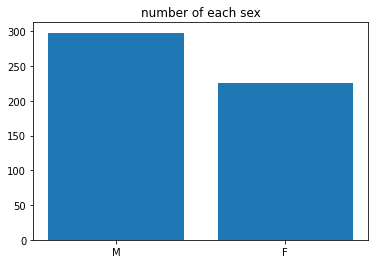

In [276]:
sex=['M','F']
sexnum=[(metadata.sex == 'M').sum(),(metadata.sex == 'F').sum()]
plt.bar(sex,sexnum)
plt.title('number of each sex')

Text(0.5, 1.0, 'samples per age')

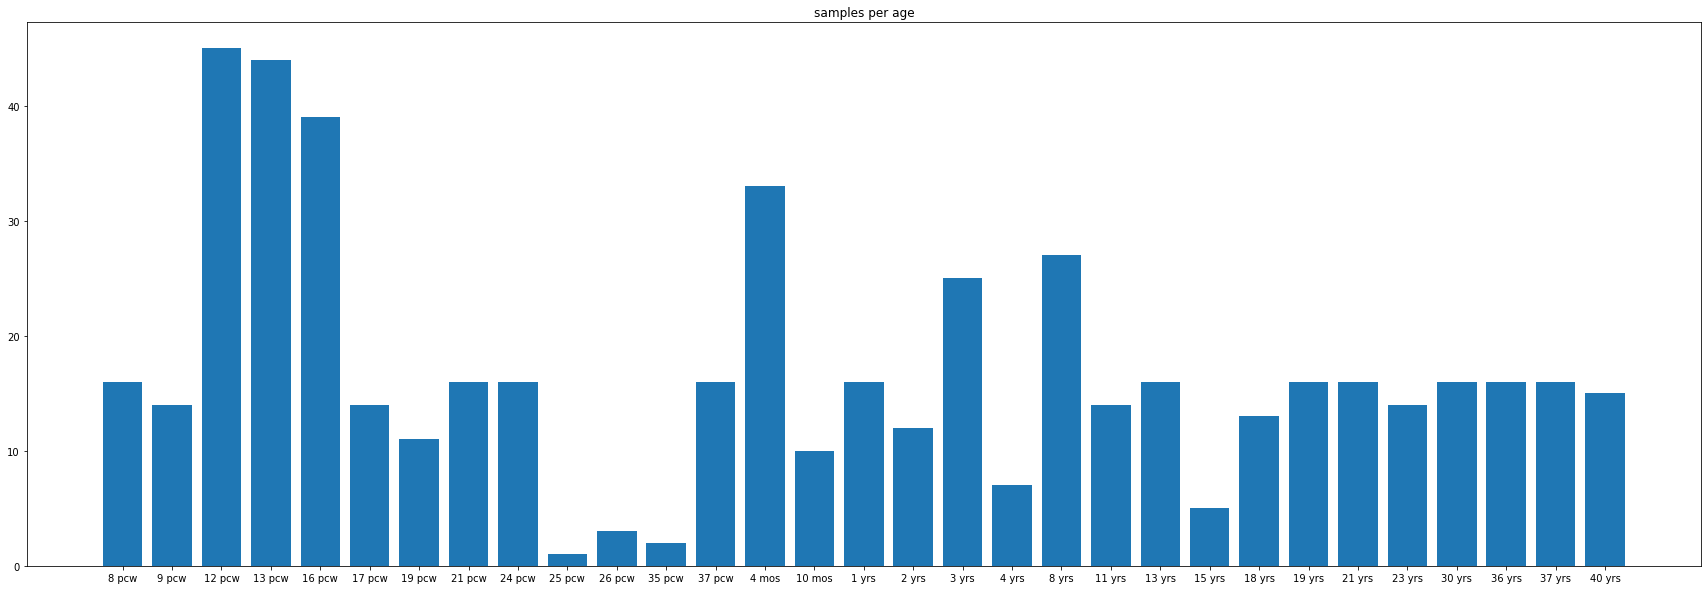

In [277]:
age=metadata.age.unique().tolist()
agedict={}
for a in age:
    agedict[a]=0
for ages in metadata.age:
    agedict[ages]+=1
plt.figure(figsize=(30,10))
plt.bar(agedict.keys(), agedict.values())

plt.title('samples per age')


Text(0.5, 1.0, 'number of samples from each brain region')

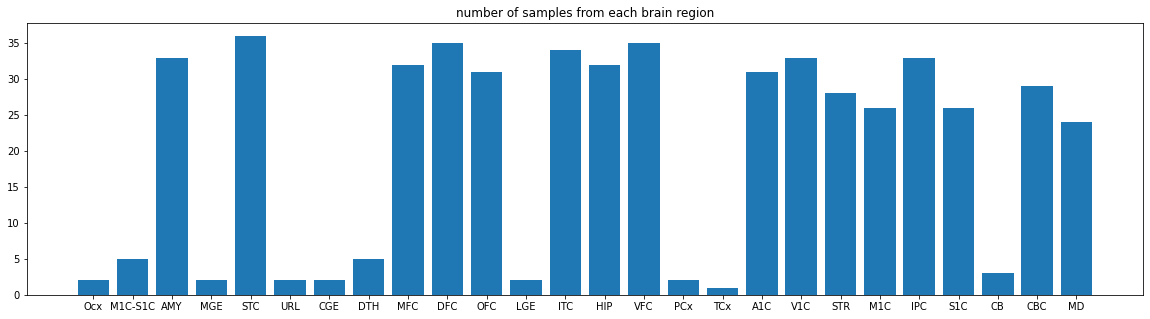

In [278]:
brainreg=metadata.brain_region.unique().tolist()
regdict={}
for r in brainreg:
    regdict[r]=0
for regs in metadata.brain_region:
    regdict[regs]+=1
plt.figure(figsize=(20,5))
plt.bar(regdict.keys(), regdict.values())

plt.title('number of samples from each brain region')




In [300]:
scaler = StandardScaler()
samples_scaled = scaler.fit_transform(nasamples.T)

samples_normalized = normalize(samples_scaled)

samples_normalized = pd.DataFrame(samples_normalized)
pca = PCA(n_components = 2)
samples_principal = pca.fit_transform(samples_normalized)
samples_principal = pd.DataFrame(samples_principal)
samples_principal.columns = ['P1', 'P2']
#creating pc1 and pc2 for PCA(principal components analysis) with patients

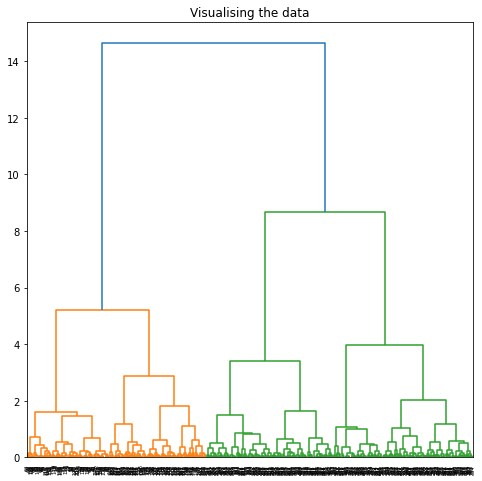

In [301]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(samples_principal, method ='ward')))
#dendrogram to show how the clusters are made

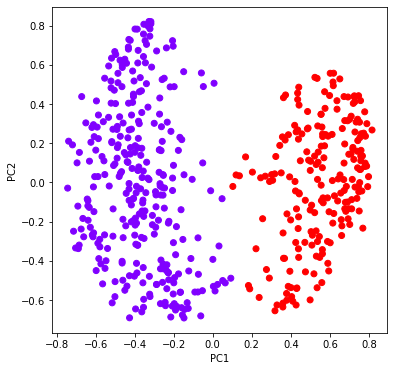

In [302]:
ac2 = AgglomerativeClustering(n_clusters = 2)


plt.figure(figsize =(6, 6))

plt.scatter(samples_principal['P1'], samples_principal['P2'], c = ac2.fit_predict(samples_principal), cmap ='rainbow')
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()




#Agglomeratively clustering plot for PCA
#There appears to be two large clusters of patients separated on the PC1 axis, each cluster is also spread across PC2

In [303]:
model = NMF( n_components=2,init='random', random_state=0)
W = model.fit_transform(nasamples)
H = model.components_


In [316]:
W=pd.DataFrame(W)
W.index= gene_df.index
W.head()

,0,1
gene_symbol,,
DPM1,0.159905,3.600303
PIGQ,0.306345,1.703969
HHATL,0.895525,2.362764
LYPLA2,0.156254,2.541521
NPC1L1,0.000886,0.004871


In [322]:
W['absdiff']=abs(W[0]-W[1])
W=W.sort_values('absdiff', ascending=False)
W.head(20)

,0,1,absdiff
gene_symbol,,,
APOE,109.482649,0.000000,109.482649
CLIP3,0.000000,60.817996,60.817996
GLUL,33.939569,14.955371,18.984197
APOC1,16.755972,0.269132,16.486840
CTSD,4.943901,20.599816,15.655915
APOD,7.059311,17.058865,9.999554
PPT1,1.808399,11.648282,9.839884
ABHD12,1.422287,9.978674,8.556386
GOLGA7,1.748346,8.808580,7.060233


In [304]:
for x in range(10):
    print(gene_df.columns[x],H[[0,1],x].tolist())

1-8 pcw-M-Ocx [0.2351078088948229, 1.3307395024995967]
2-8 pcw-M-M1C-S1C [0.09043736497891684, 1.710741928270135]
3-8 pcw-M-AMY [0.13396029925590852, 1.6544716124483243]
4-8 pcw-M-MGE [0.10271154008246401, 1.6163313574898688]
5-8 pcw-M-STC [0.3770283509198194, 1.9665495406315203]
6-8 pcw-M-URL [0.3225620660762153, 1.8280744898923103]
7-8 pcw-M-CGE [0.054962334395825575, 1.8677425666393153]
8-8 pcw-M-DTH [0.09347208226561338, 1.4351180552581282]
9-8 pcw-M-MFC [0.17187944087425278, 1.1728296637863602]
10-8 pcw-M-DFC [0.22669338154446808, 1.074525024715463]


In [284]:
H2=[]
for x in range(524):
    t=(gene_df.columns[x],H[0,x])
    
    
    H2.append(t)
    

H2.sort( key=lambda x:x[1], reverse=True)

print(H2[:10])

[('227-37 pcw-M-MD', 19.932149203434133), ('301-2 yrs-F-MD', 19.9309679119612), ('307-2 yrs-F-V1C', 17.174840843396467), ('302-2 yrs-F-DFC', 16.93855193537237), ('300-2 yrs-F-ITC', 16.190048242689116), ('322-3 yrs-M-M1C', 15.85753344412997), ('306-2 yrs-F-OFC', 15.652895726369229), ('297-2 yrs-F-VFC', 15.483519051184738), ('325-3 yrs-M-IPC', 14.874145704920634), ('279-10 mos-M-MD', 14.340291176593901)]


In [285]:
H_df=pd.DataFrame(H, columns=gene_df.columns).T
x=[]
for value in H.T:
    if value[0] > value[1]:
        x.append(0)
#     elif value[1] > value[0] and value[1]>value[2]:
#         x.append(1)
#     else:x.append(2)
    else:
        x.append(1)
H_df['C']=x

H_df['C_new']=H_df.iloc[:,0:2].idxmax(axis=1)

# H_df['0_1_diff'] =H_df[0]-H_df[1]
# H_df=H_df.sort_values(by='0_1_diff', ascending=False)
print(H_df)
C0s=H_df.loc[H_df['C']==0].index
C1s=H_df.loc[H_df['C']==1].index
# C2s=H_df.loc[H_df['C']==2].index
print(x)

                          0         1  C  C_new
1-8 pcw-M-Ocx      0.235108  1.330740  1      1
2-8 pcw-M-M1C-S1C  0.090437  1.710742  1      1
3-8 pcw-M-AMY      0.133960  1.654472  1      1
4-8 pcw-M-MGE      0.102712  1.616331  1      1
5-8 pcw-M-STC      0.377028  1.966550  1      1
...                     ...       ... ..    ...
520-40 yrs-F-IPC   0.217530  3.125158  1      1
521-40 yrs-F-M1C   1.054312  2.749458  1      1
522-40 yrs-F-HIP   2.042951  1.734715  0      0
523-40 yrs-F-STR   3.444802  2.444322  0      0
524-40 yrs-F-S1C   0.783319  3.011674  1      1

[524 rows x 4 columns]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [286]:
H_df["C"].value_counts()


1    407
0    117
Name: C, dtype: int64

In [287]:
H_df.head()

,0,1,C,C_new
1-8 pcw-M-Ocx,0.235108,1.330740,1,1
2-8 pcw-M-M1C-S1C,0.090437,1.710742,1,1
3-8 pcw-M-AMY,0.133960,1.654472,1,1
4-8 pcw-M-MGE,0.102712,1.616331,1,1
5-8 pcw-M-STC,0.377028,1.966550,1,1


In [288]:
np.random.seed(1)
tsne_data=gene_df.T
# print(tsne_data)
# print(H_df.index)
tsne_data=tsne_data.loc[H_df.index]

tsne_shownData= TSNE(n_components=2).fit_transform(tsne_data)
# print(tsne_shownData)
tsne_data.head()

gene_symbol,DPM1,PIGQ,HHATL,LYPLA2,NPC1L1,ZDHHC6,HHAT,ATG5,PIGV,DGAT2,...,ZDHHC11,APOD,PGAP1,ATG7,GPAA1,SVIP,ZDHHC18,APOM,LCAT,ITGB3
1-8 pcw-M-Ocx,34.373239,4.957886,0.0,15.007184,0.006853,16.803420,1.861921,9.302048,1.948372,0.259309,...,0.074568,3.987598,18.528562,7.395518,17.528421,4.706358,9.404380,4.981144,0.985188,0.613023
2-8 pcw-M-M1C-S1C,20.765661,4.885296,0.0,8.533285,0.000000,13.584455,1.164793,6.588545,1.630550,0.175087,...,0.357056,3.782146,18.162287,6.270376,13.631538,3.092537,9.320760,4.648099,1.471467,0.405086
3-8 pcw-M-AMY,18.734947,4.508666,0.0,10.774588,0.000000,11.185755,1.120949,6.282318,1.335926,0.576523,...,0.152814,5.219452,17.848180,6.394491,20.184930,1.453678,7.921595,4.193755,0.659026,0.224634
4-8 pcw-M-MGE,22.366394,4.872717,0.0,7.240709,0.000000,11.722672,1.662500,7.177213,1.594737,0.308998,...,0.087677,0.953690,13.053936,7.512032,18.166466,2.364709,8.393510,4.935286,1.201308,0.512886
5-8 pcw-M-STC,19.228431,4.399800,0.0,9.406447,0.021421,11.752288,1.256894,6.606826,1.390376,0.228871,...,0.162762,13.649302,19.430527,6.623395,17.413062,2.428490,9.572363,3.407114,1.096786,0.521908


In [289]:
tsne_shownData=pd.DataFrame(tsne_shownData)
tsne_shownData.index=H_df.index
tsne_shownData.head()

,0,1
1-8 pcw-M-Ocx,-19.973309,29.166794
2-8 pcw-M-M1C-S1C,-22.375364,24.109337
3-8 pcw-M-AMY,-20.937649,25.020212
4-8 pcw-M-MGE,-21.591570,25.135954
5-8 pcw-M-STC,-15.486184,17.784664


In [290]:
print(H_df)

                          0         1  C  C_new
1-8 pcw-M-Ocx      0.235108  1.330740  1      1
2-8 pcw-M-M1C-S1C  0.090437  1.710742  1      1
3-8 pcw-M-AMY      0.133960  1.654472  1      1
4-8 pcw-M-MGE      0.102712  1.616331  1      1
5-8 pcw-M-STC      0.377028  1.966550  1      1
...                     ...       ... ..    ...
520-40 yrs-F-IPC   0.217530  3.125158  1      1
521-40 yrs-F-M1C   1.054312  2.749458  1      1
522-40 yrs-F-HIP   2.042951  1.734715  0      0
523-40 yrs-F-STR   3.444802  2.444322  0      0
524-40 yrs-F-S1C   0.783319  3.011674  1      1

[524 rows x 4 columns]


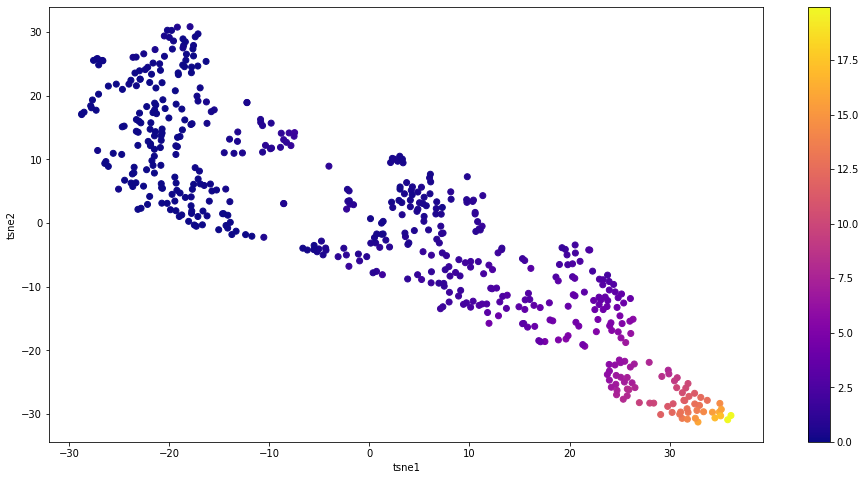

In [291]:
plt.figure(figsize=(16,8))
plt.scatter(tsne_shownData[0],tsne_shownData[1], c= H_df[0], cmap='plasma')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
bar=plt.colorbar()

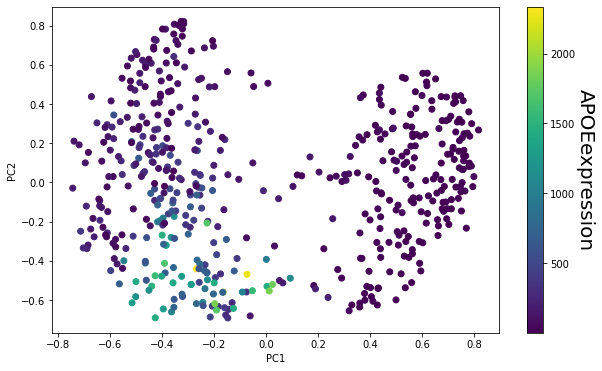

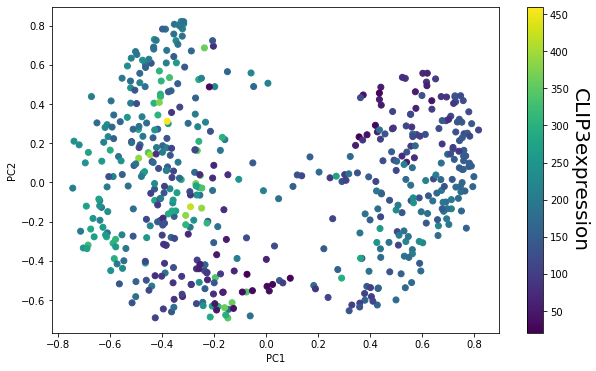

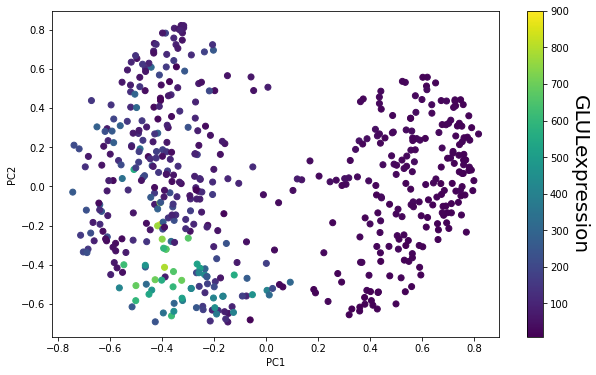

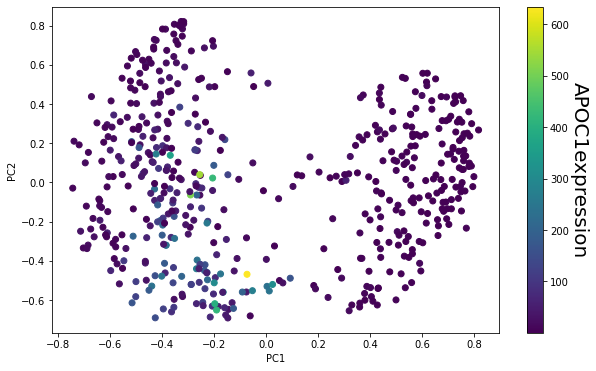

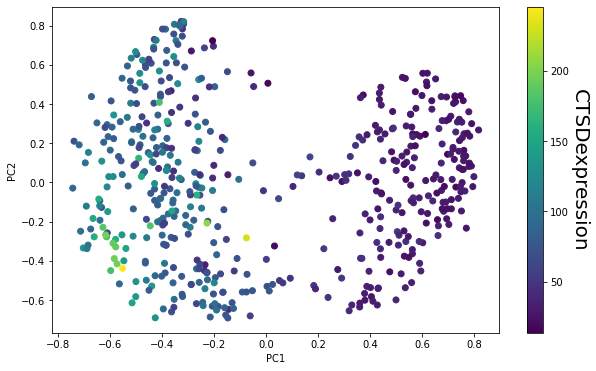

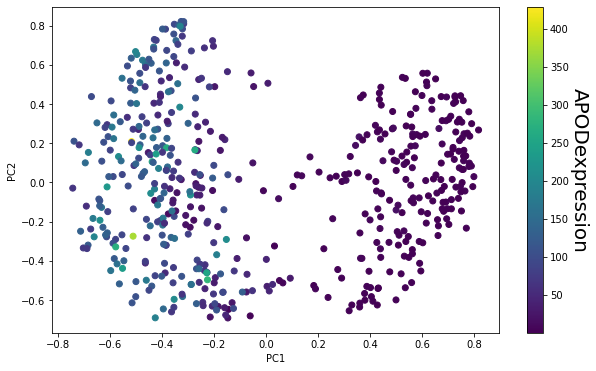

In [336]:
i=0
for gene in W.index:
    plt.figure(figsize =(10, 6))

    plt.scatter(samples_principal['P1'], samples_principal['P2'],c=gene_df.loc[gene])
    plt.ylabel('PC2')
    plt.xlabel('PC1')
  
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(gene+'expression', rotation=270, size=20, labelpad=20)
    i+=1
    if i >5:
        break

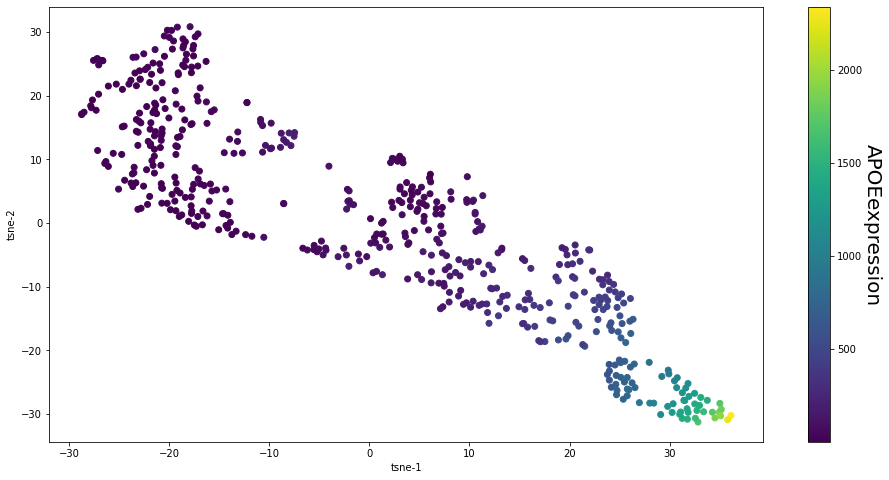

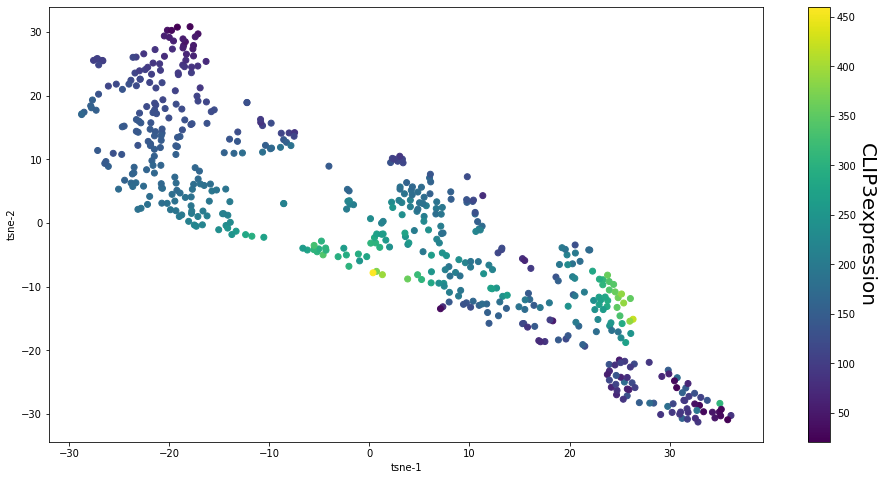

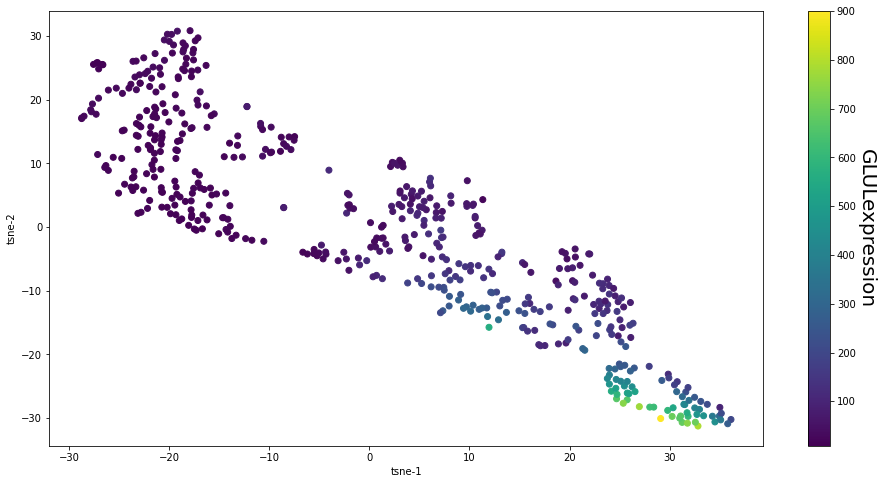

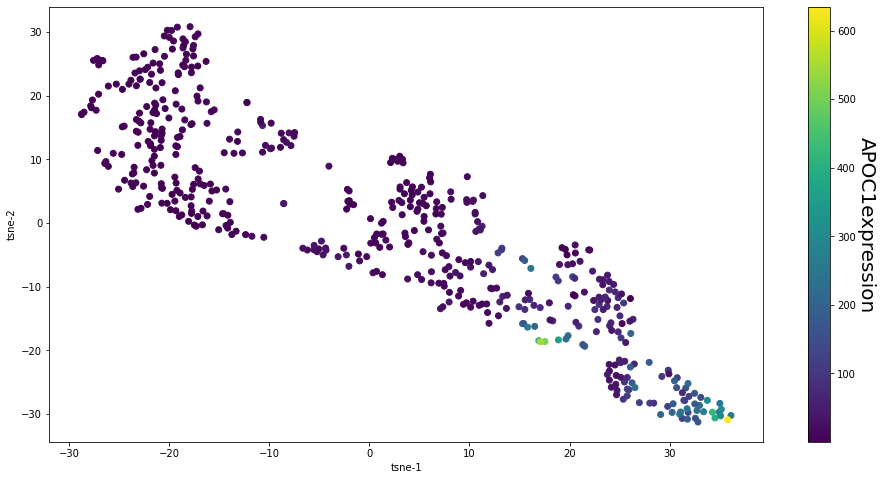

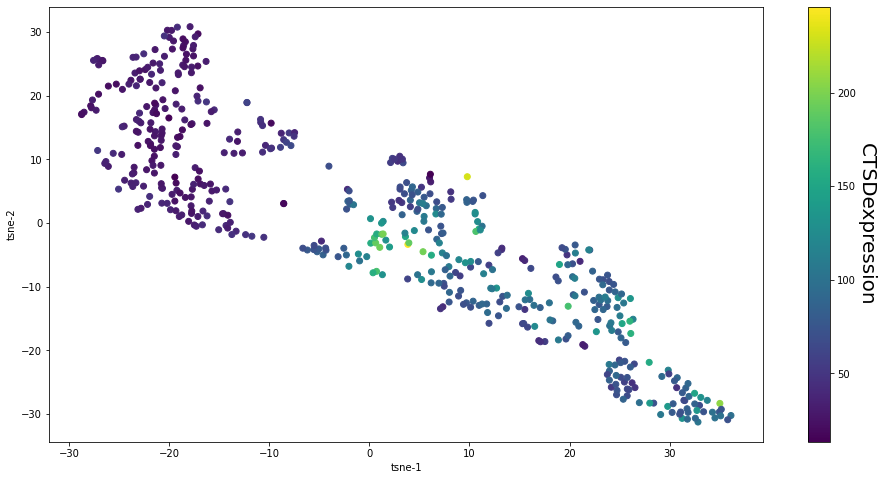

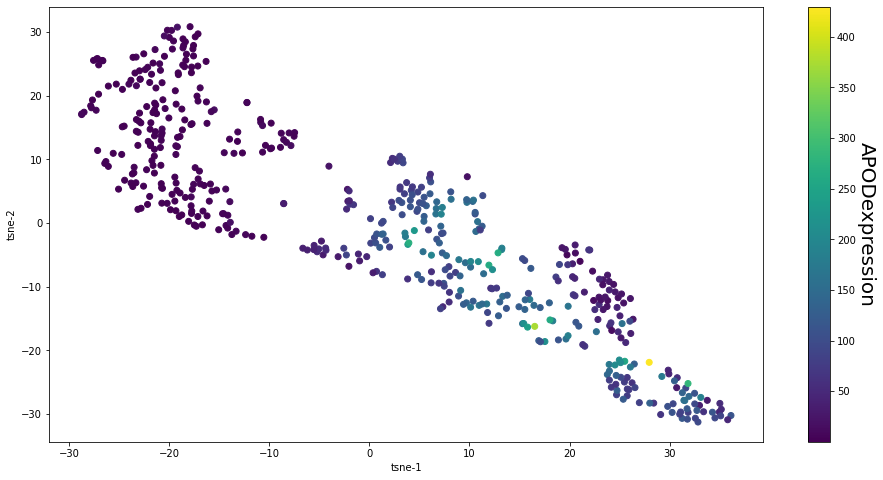

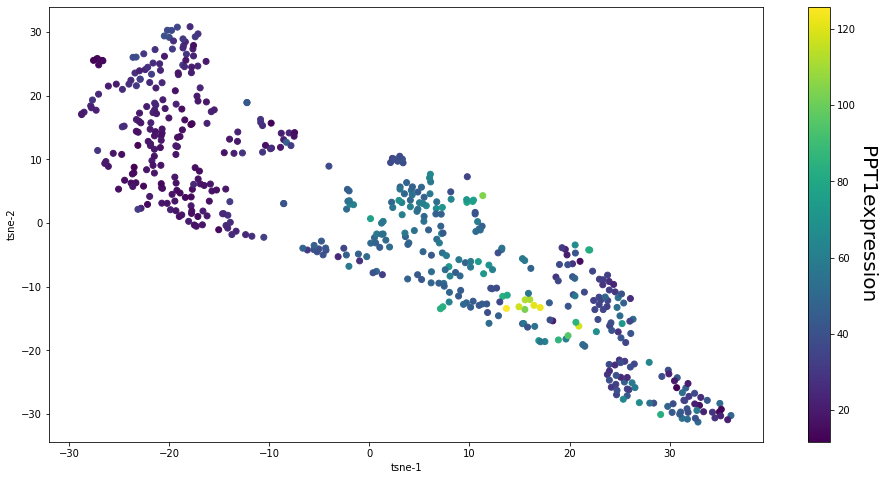

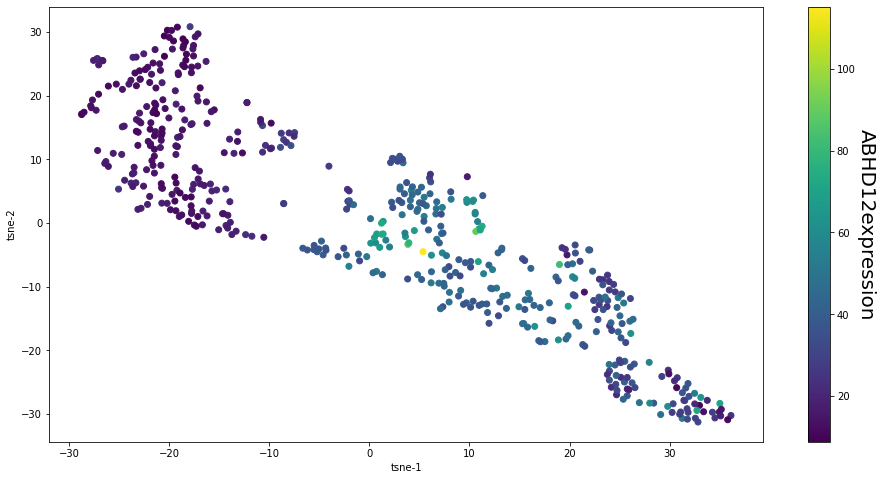

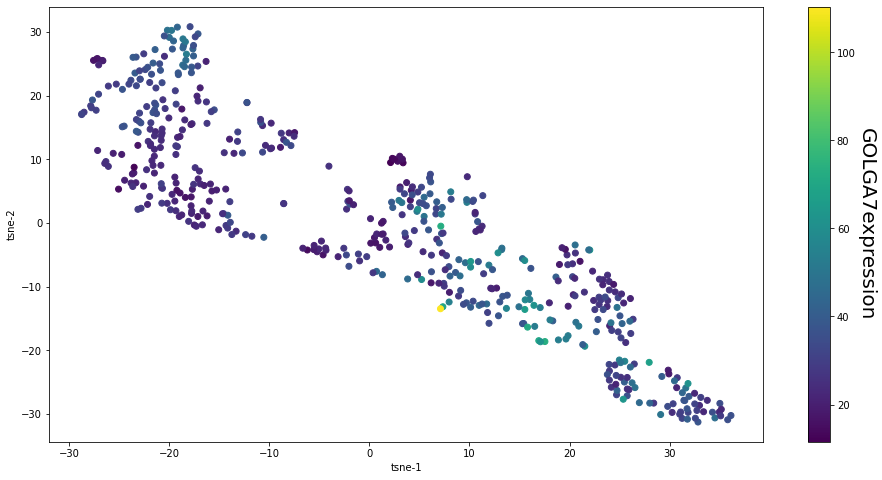

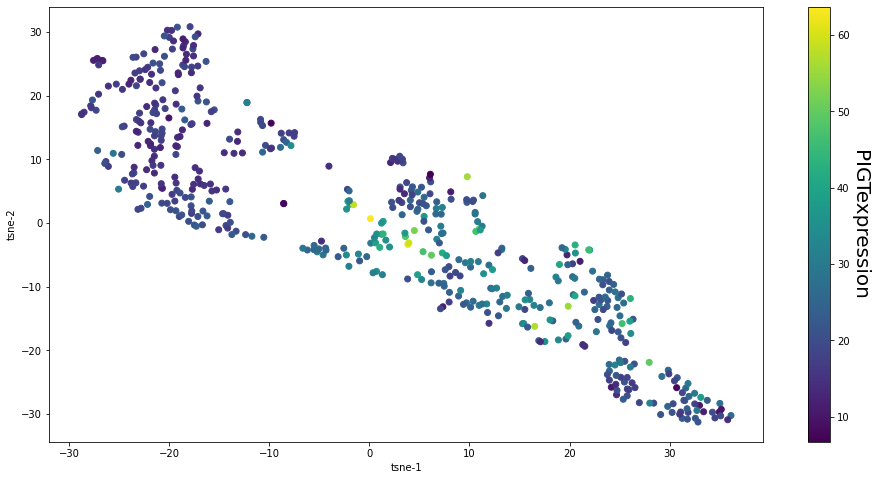

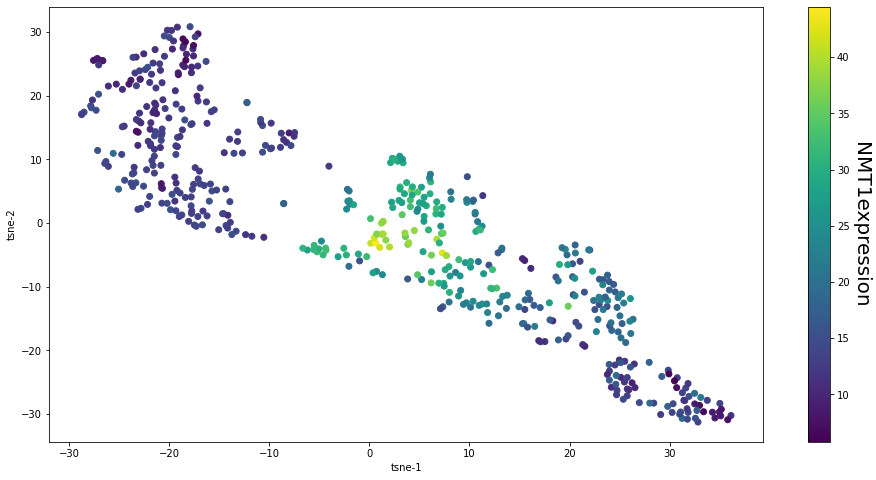

In [327]:
i=0
for gene in W.index:
    plt.figure(figsize=(16,8))

    plt.scatter(xs, ys, c=tsne_data[gene])
    plt.xlabel('tsne-1')
    plt.ylabel('tsne-2')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(gene+'expression', rotation=270, size=20, labelpad=20)
    i+=1
    if i >10:
        break

In [293]:
ageRegex=re.compile('.*-(\d+) (.+)-.+-')
C0ages =[]
for sample in C0s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units= matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C0ages.append(age)
    
C1ages=[]
for sample in C1s:
    matches=ageRegex.findall(sample)
    age=int(matches[0][0])
    units=matches[0][1]
    if units =='mos':
        age=age*4
    if units =='pcw':
        age=np.abs(age-38)*-1
    if units =='yrs':
        age=age*52
        
    C1ages.append(age)

# C2ages=[]
# for sample in C2s:
#     matches=ageRegex.findall(sample)
#     age=int(matches[0][0])
#     units=matches[0][1]
#     if units =='mos':
#         age=age*4
#     if units =='pcw':
#         age=np.abs(age-38)*-1
#     if units =='yrs':
#         age=age*52
        
#     C2ages.append(age)
    
print('Mean C0 age',np.mean(C0ages))
print('Mean C1 age',np.mean(C1ages))
# print('Mean C2 age',np.mean(C2ages))


print('Median C0 age',np.median(C0ages))
print('Median C1 age',np.median(C1ages))
# print('Median C2 age',np.median(C2ages))

Mean C0 age 382.12820512820514
Mean C1 age 422.12530712530713
Median C0 age 156.0
Median C1 age -14.0


Text(0.5, 0, 'age in weeks (0 is birth)')

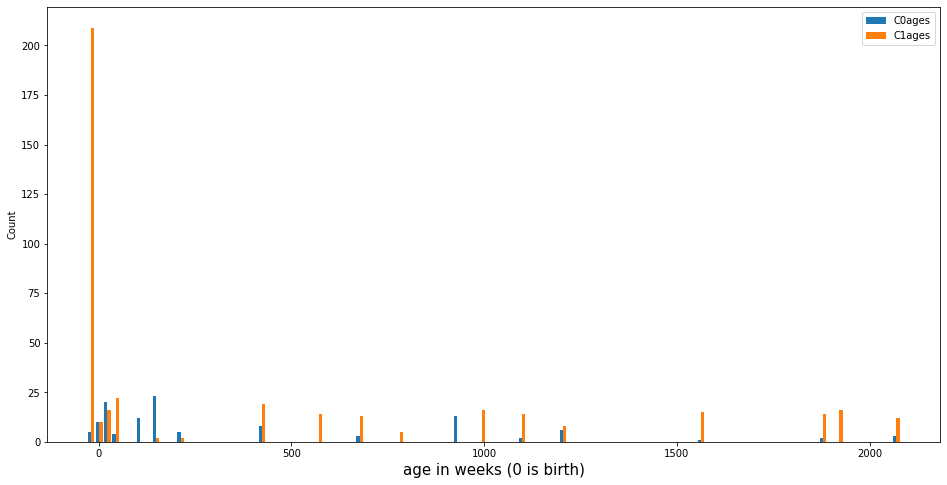

In [294]:
plt.figure(figsize=(16,8))
plt.hist([C0ages,C1ages],100,label=['C0ages', 'C1ages'])
plt.legend(loc= 'upper right')
plt.ylabel("Count")
plt.xlabel("age in weeks (0 is birth)",size=15)

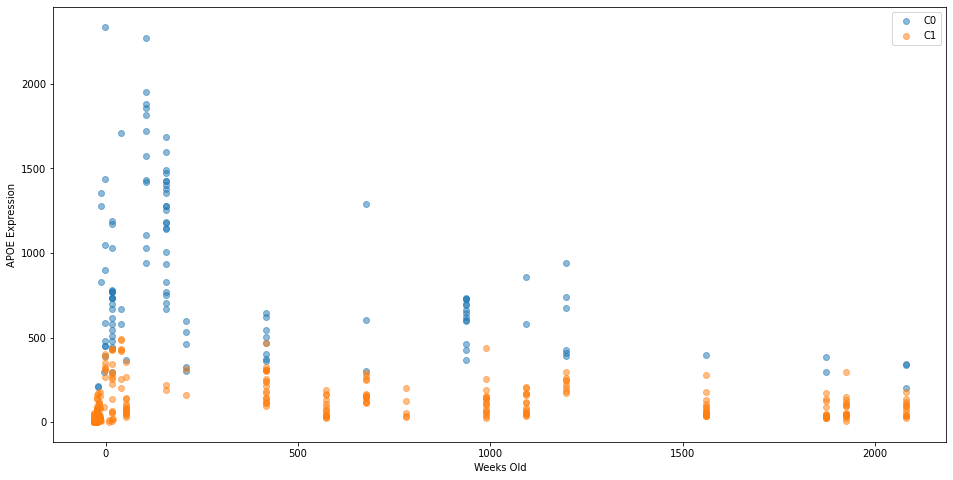

In [305]:
plt.figure(figsize=(16,8))
plt.scatter(C0ages, gene_df.loc['APOE'][C0s], label='C0',alpha=.5)
plt.scatter(C1ages, gene_df.loc['APOE'][C1s], label='C1',alpha=.5)
# plt.scatter(C2ages, gene_df.loc['APOE'][C2s], label='C2',alpha=.5)
plt.ylabel('APOE Expression')
plt.xlabel('Weeks Old')
plt.legend(loc='upper right')

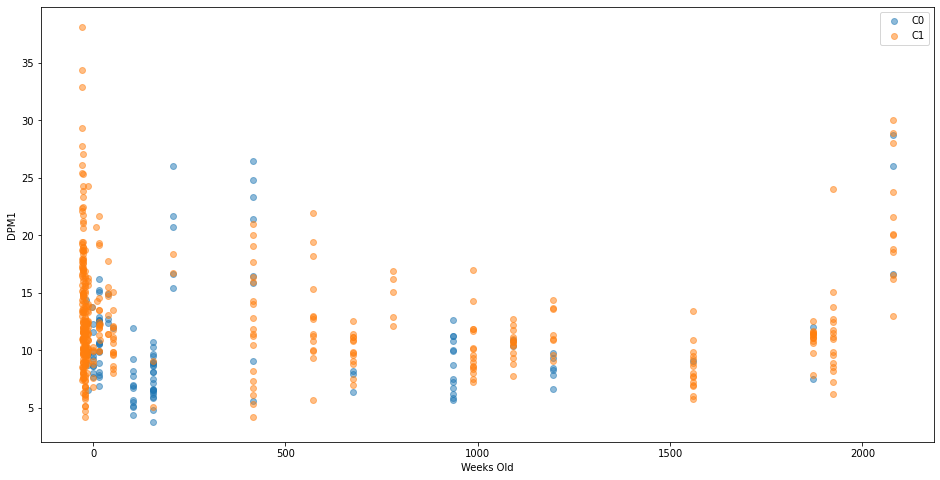

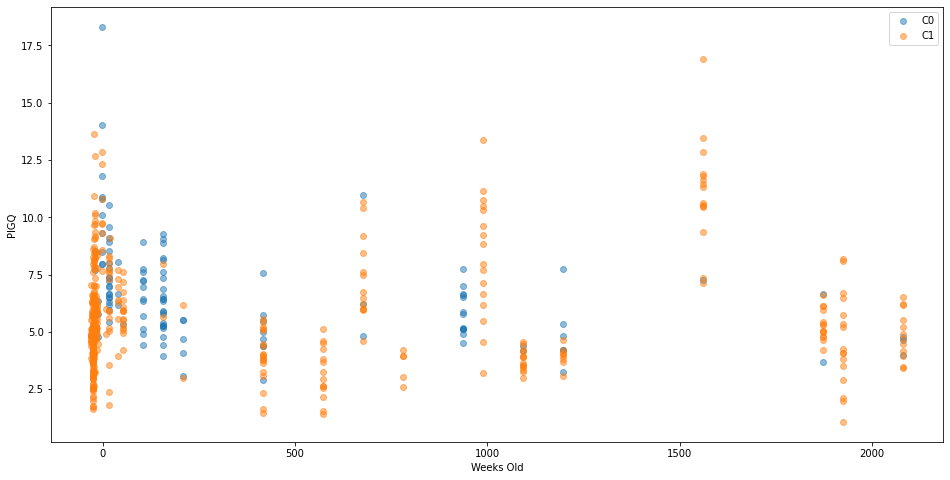

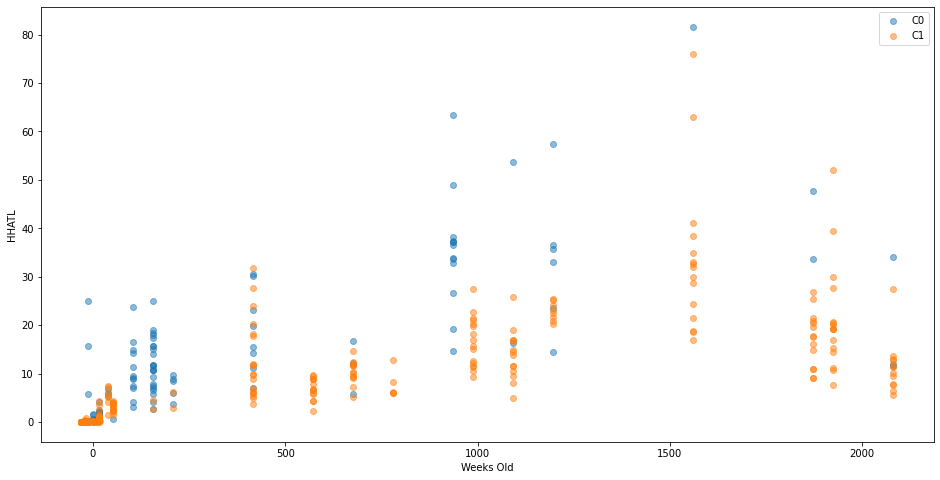

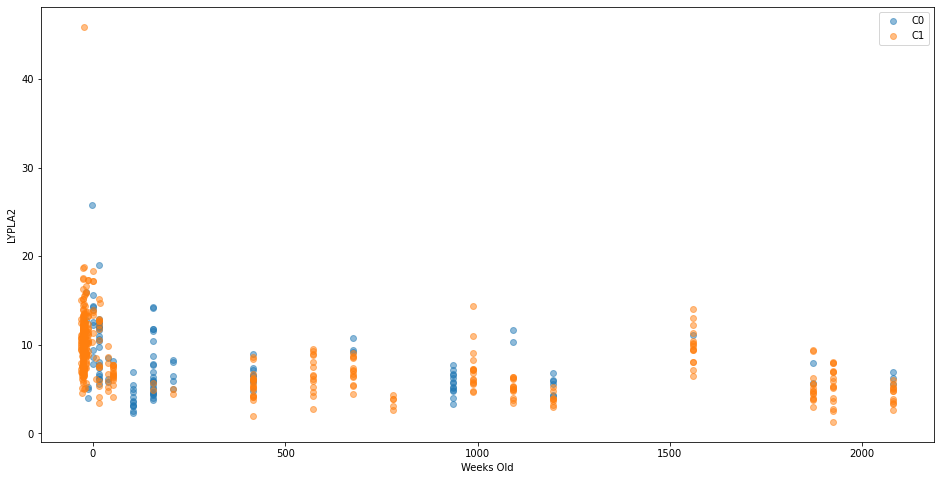

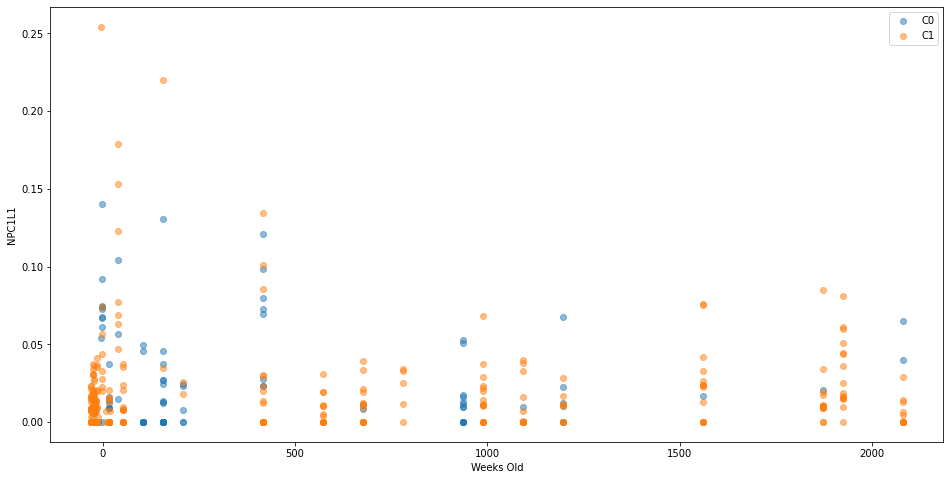

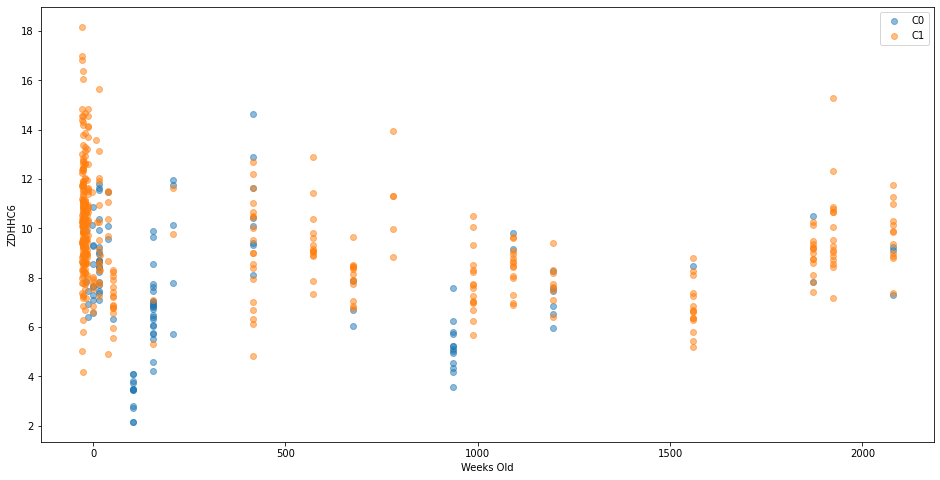

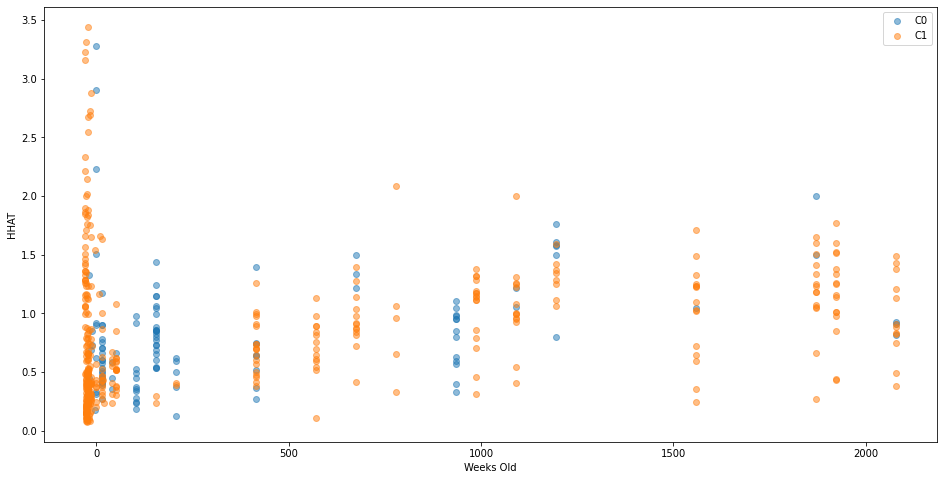

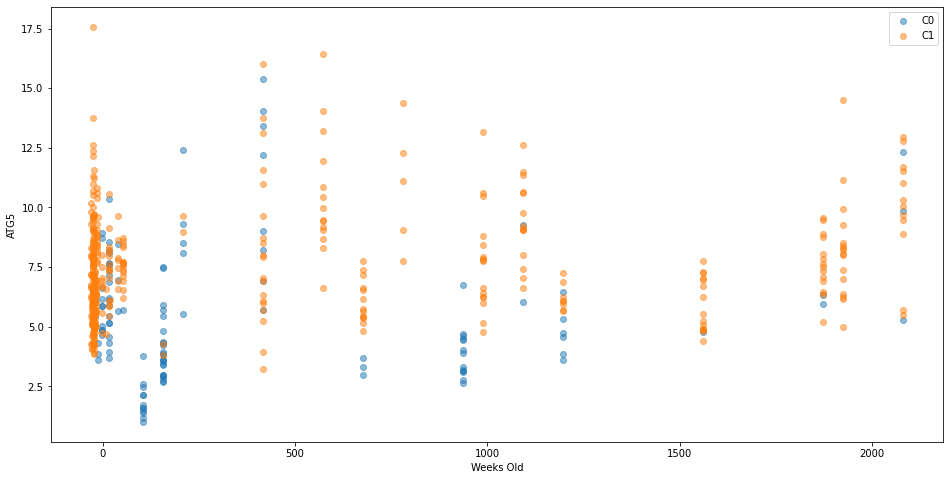

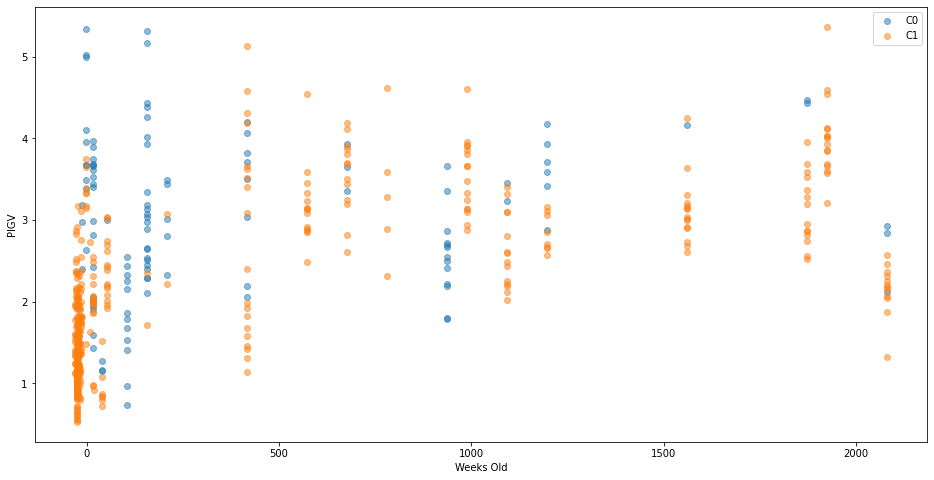

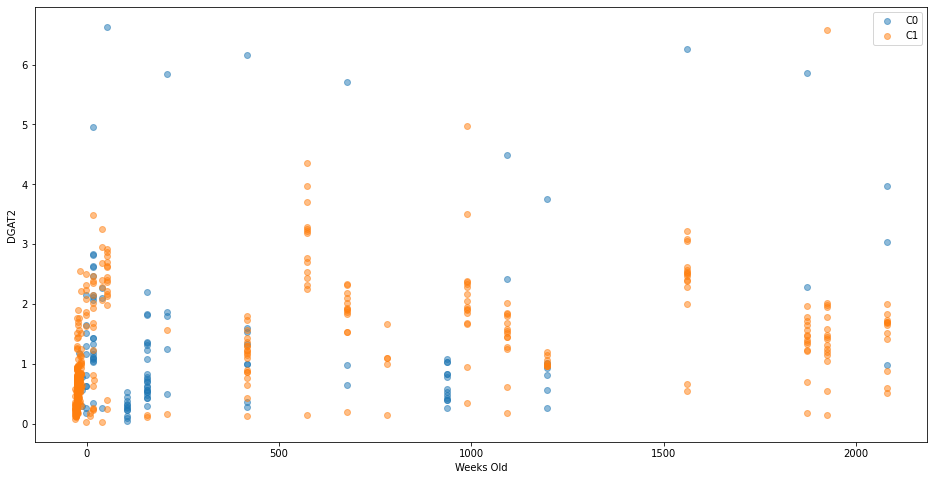

In [311]:
for x in range(10):  
    plt.figure(figsize=(16,8))
    plt.scatter(C0ages, gene_df.iloc[x][C0s], label='C0',alpha=.5)
    plt.scatter(C1ages, gene_df.iloc[x][C1s], label='C1',alpha=.5)
#     plt.scatter(C2ages, gene_df.iloc[x][C2s], label='C2',alpha=.5)
    plt.ylabel(genes[x])
    plt.xlabel('Weeks Old')
    plt.legend(loc='upper right')

In [308]:
C0_age_d={}
C1_age_d={}
# C2_age_d={}
x=0
for sample in C0ages:
    if sample in C0_age_d.keys():
        C0_age_d[sample].append(C0s[x])
    else:
        C0_age_d[sample] = [C0s[x]]
        
    x+=1

    
# print(C0_age_d)                

y=0
for sample in C1ages:
    if sample in C1_age_d.keys():
        C1_age_d[sample].append(C1s[y])
    else:
        C1_age_d[sample] = [C1s[y]]
        
    y+=1        
        
# print(C1_age_d)
# z=0
# for sample in C2ages:
#     if sample in C2_age_d.keys():
#         C2_age_d[sample].append(C2s[z])
#     else:
#         C2_age_d[sample] = [C2s[z]]
        
#     z+=1        
        
# print(C2_age_d)         

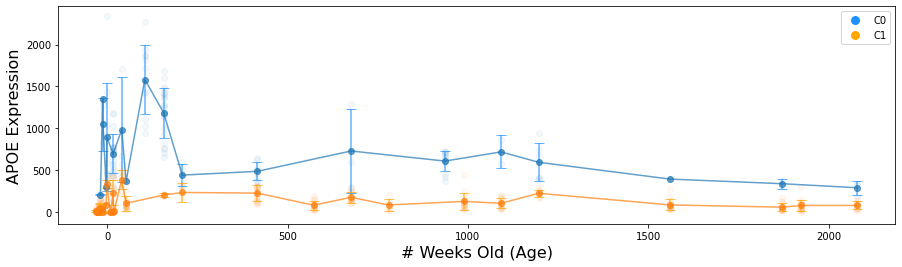

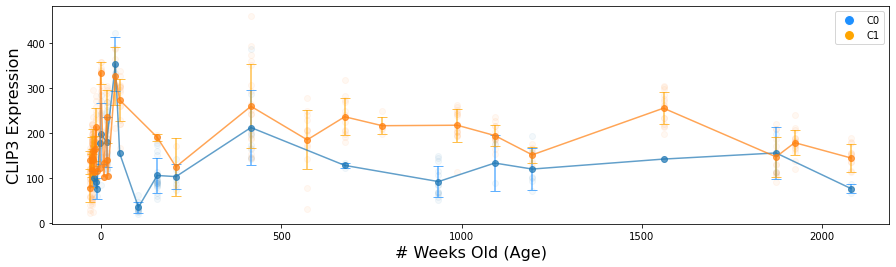

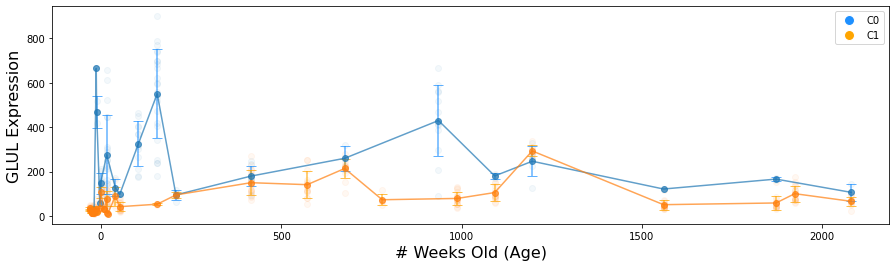

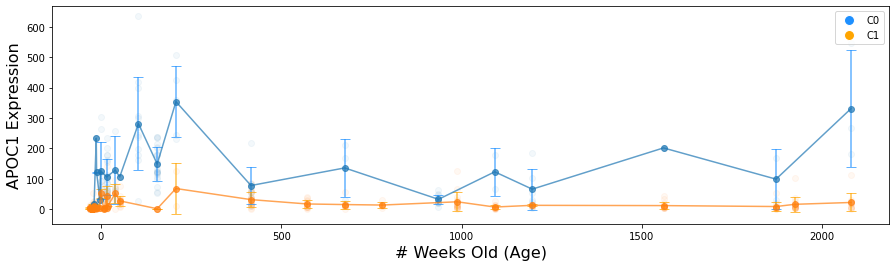

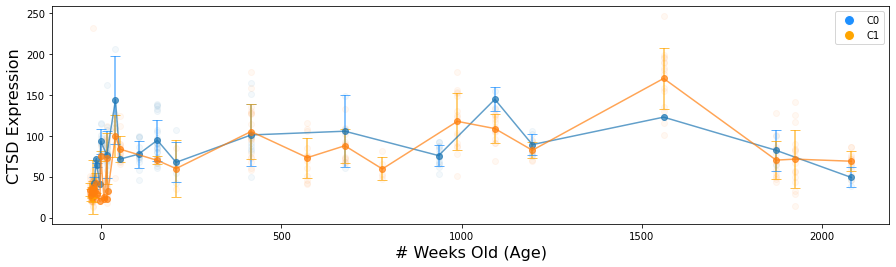

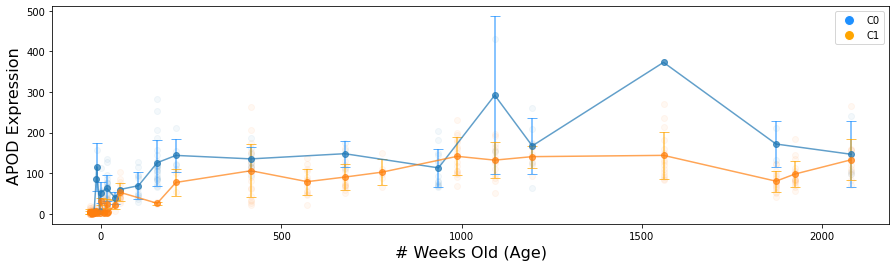

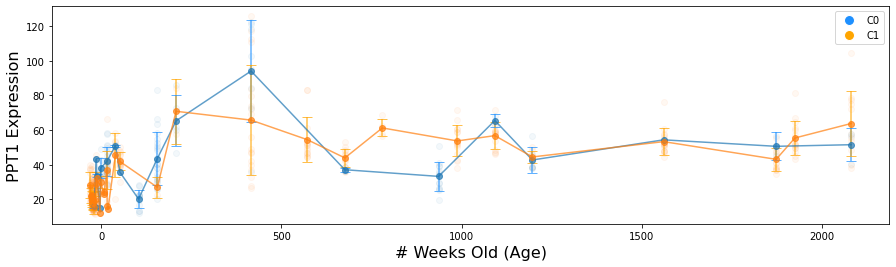

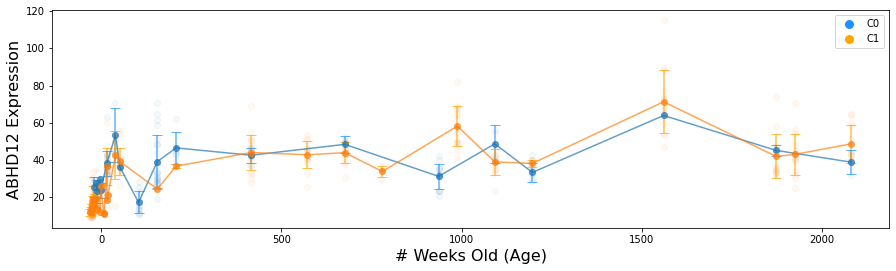

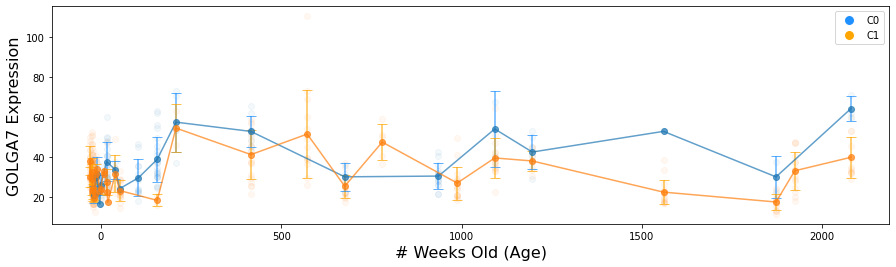

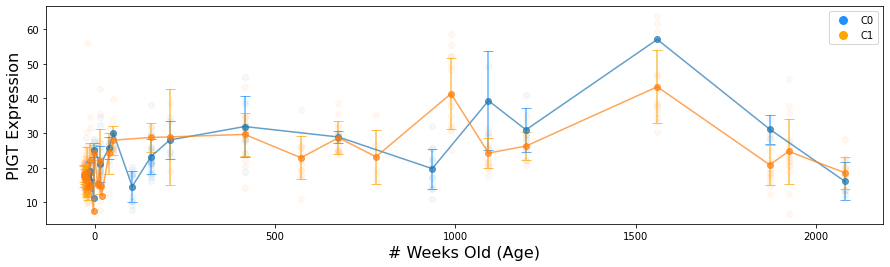

In [340]:
figsizes = (15, 4)
genes = W.index[0:10]
for gene in genes:
    C0_keys = sorted(C0_age_d.keys())
    C0_means = [gene_df.loc[gene, C0_age_d[x]].mean() for x in C0_keys]
    C0_std = [gene_df.loc[gene, C0_age_d[x]].std() for x in C0_keys]
    
    C1_keys = sorted(C1_age_d.keys())
    C1_means = [gene_df.loc[gene, C1_age_d[x]].mean() for x in C1_keys]
    C1_std = [gene_df.loc[gene, C1_age_d[x]].std() for x in C1_keys]
    
#     C2_keys = sorted(C2_age_d.keys())
#     C2_means = [gene_df.loc[gene, C2_age_d[x]].mean() for x in C2_keys]
#     C2_std = [gene_df.loc[gene, C2_age_d[x]].std() for x in C2_keys]
    
    plt.figure(figsize=figsizes)
    plt.scatter(C0ages, gene_df.loc[gene][C0s], label='C0', alpha=0.05)
    plt.scatter(C1ages, gene_df.loc[gene][C1s], label='C1', alpha=0.05)
#     plt.scatter(C2ages, gene_df.loc[gene][C2s], label='C2', alpha=0.05)
#     plt.plot(C0_keys, C0_means, '-o',color="dodgerblue")
    plt.errorbar(C0_keys, C0_means, yerr=C0_std,capsize=5, fmt="-",ecolor="dodgerblue",alpha=.7,marker='o')
#     plt.plot(C1_keys, C1_means, '-o',color="orange")
    plt.errorbar(C1_keys, C1_means, yerr=C1_std,capsize=5, fmt="-",ecolor="orange",alpha=.7,marker='o')
#     plt.plot(C2_keys, C2_means, '-o',color="green")
#     plt.errorbar(C2_keys, C2_means, yerr=C2_std,capsize=5, fmt="-",ecolor="green",alpha=.7,marker='o')
    line1 = pylab.Line2D(range(1),range(1),color='white', marker='o',markersize=10, markerfacecolor="orange",alpha=1.0)
    line2 = pylab.Line2D(range(10),range(10),color='white',marker="o",markersize=10,markerfacecolor="dodgerblue",alpha=1.0)
#     line3 = pylab.Line2D(range(10),range(10),color='white',marker="o",markersize=10,markerfacecolor="green",alpha=1.0)
    
    
    plt.legend((line2,line1),('C0','C1'),numpoints=1,loc=1)
    plt.ylabel(gene + ' Expression', size=16)
    plt.xlabel('# Weeks Old (Age)', size=16)